In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(context='poster', style='dark')

In [2]:
Tq = 30
Q = 10

Tq*(1-(Q-1)/Q)

2.999999999999999

In [2]:
df = pd.read_csv('scenario1.txt', header=None, sep='\t')
df.columns=['time', 'num_requests', 'mean_resp_time']
# df['time_service'] = df.mean_resp_time / df.num_requests
# df['time_busy'] = df.num_requests * df.mean_resp_time
# df['_cust'] = 1/df.mean_resp_time
print(df.head(10))
print('...')

    time  num_requests  mean_resp_time
0  21601             2           0.052
1  21602             1           0.034
2  21603             5           0.077
3  21604             4           0.064
4  21605             1           0.138
5  21606             3           0.087
6  21607             2           0.067
7  21608             2           0.058
8  21609             2           0.102
9  21610             3           0.107
...


In [ ]:
# df.time_service = np.zeros(len(df))

# for i in range(10, len(df)):
#     df.iloc[i]['time_service'] = np.sum(df.iloc[i-10:i].mean_resp_time) / np.sum(df.iloc[i-10:i].num_requests)

In [14]:
lag = 3600 # number of seconds in our window; should be no less than the maximum mean_resp_time

# time_service = np.zeros(len(df))
mean_resp_time = df.mean_resp_time
time_service = mean_resp_time # pre-initialize (first lag values will stay unchanged)
num_requests = df.num_requests

In [ ]:
# this took painfully long time:
for i in range(lag, len(mean_resp_time)):
    time_service[i] = np.mean(mean_resp_time[i-lag:i]) / np.mean(num_requests[i-lag:i])

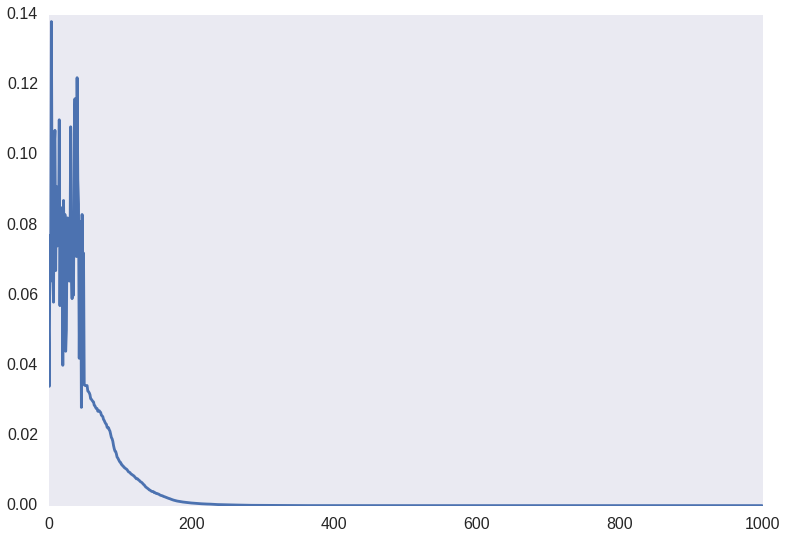

In [12]:
plt.plot(time_service[:1000])

In [8]:
np.save('time_service.npy', time_service)

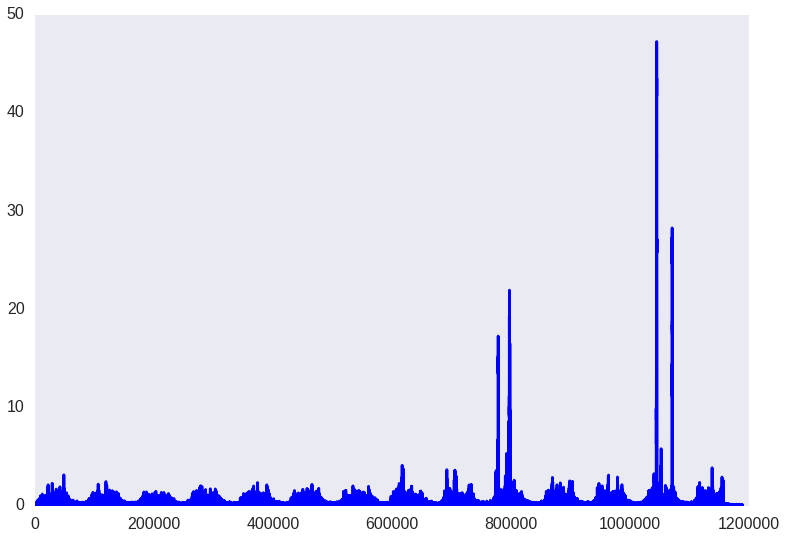

In [3]:
plt.plot(df.mean_resp_time, 'b')

# plt.xlim([0, 150000])
# plt.ylim([0, 3.5])

# plt.figure()

# plt.plot(time_service, 'r')
# plt.xlim([0, 200000])
# plt.ylim([0, 3.5])

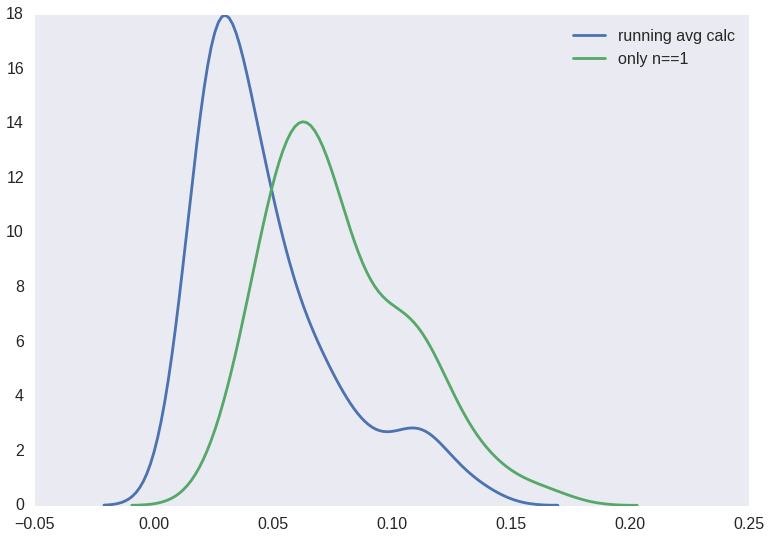

In [65]:
time_service[0] = mean_resp_time[0]
sns.kdeplot(time_service[0:100], label='running avg calc')
sns.kdeplot(df[df.num_requests==1].iloc[0:100].mean_resp_time, label='only n==1')


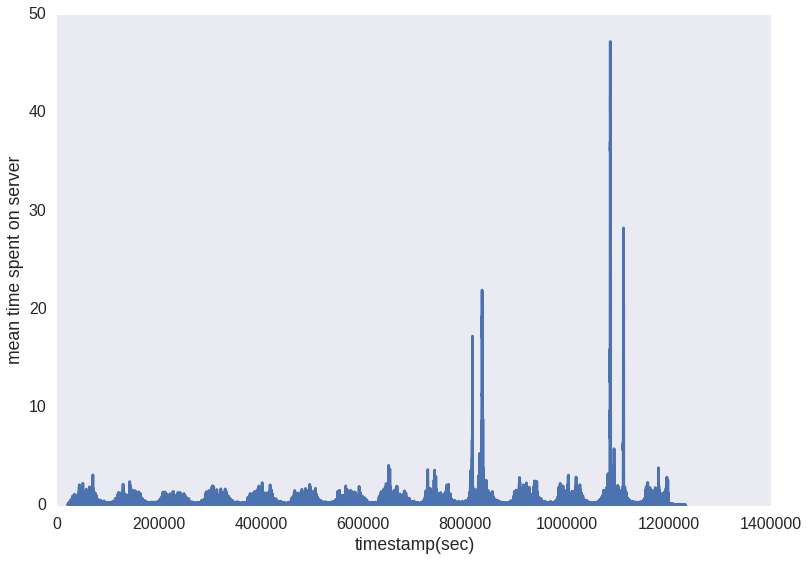

In [147]:
plt.plot(df.time, df.mean_resp_time)
plt.xlabel('timestamp(sec)')
plt.ylabel('mean time spent on server')

In [145]:
df.plot(x='time', y='number of requests')
f = plt.gcf()

KeyError: 'number of requests'

(-100, 1250000)

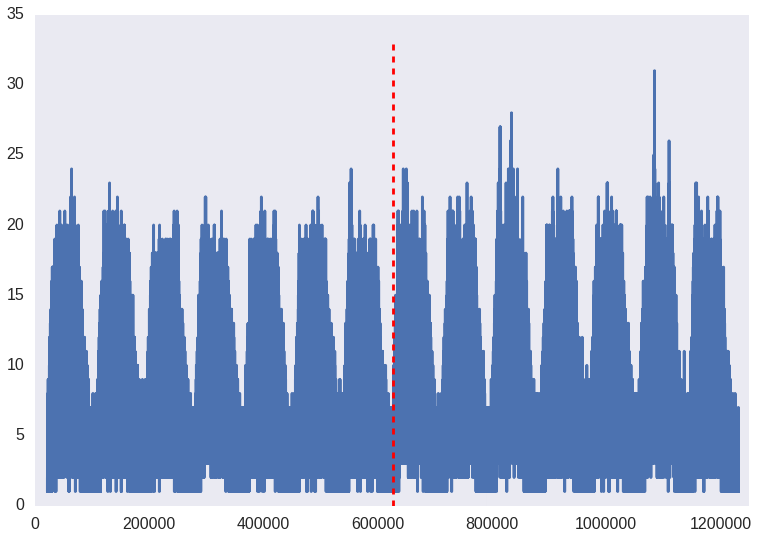

In [27]:
plt.plot(df.time, df.num_requests)
# plt.plot()
plt.plot([626400, 626400], [0, 33], 'r--')
plt.xlim([-100, 1250000])

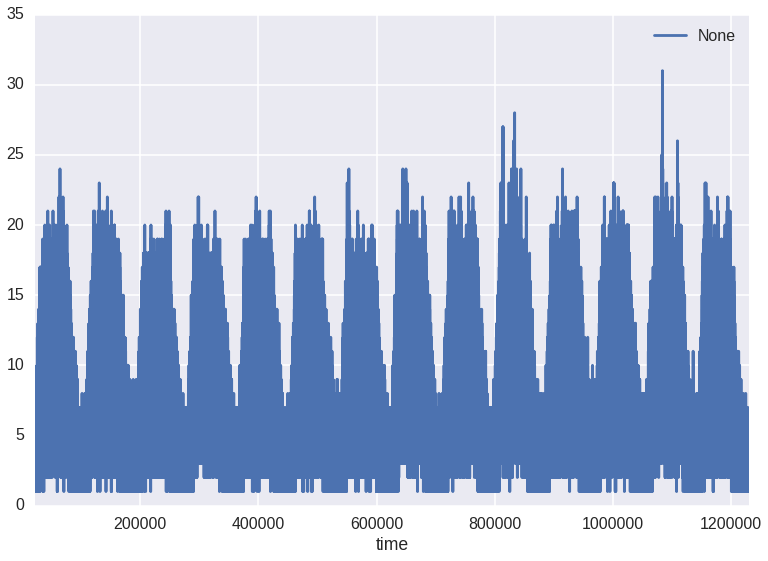

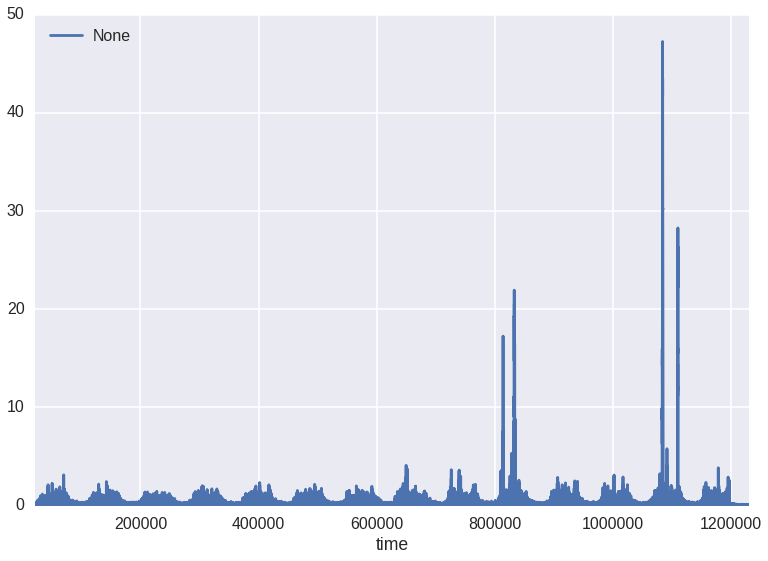

In [13]:
df.plot(x='time', y='num_requests')
plt.figure()
df.plot(x='time', y='mean_resp_time')

In [17]:
df['time_busy'] = df.num_requests * df.mean_resp_time
df.head()

,time,num_requests,mean_resp_time,time_busy
0,21601,2,0.052,0.104
1,21602,1,0.034,0.034
2,21603,5,0.077,0.385
3,21604,4,0.064,0.256
4,21605,1,0.138,0.138


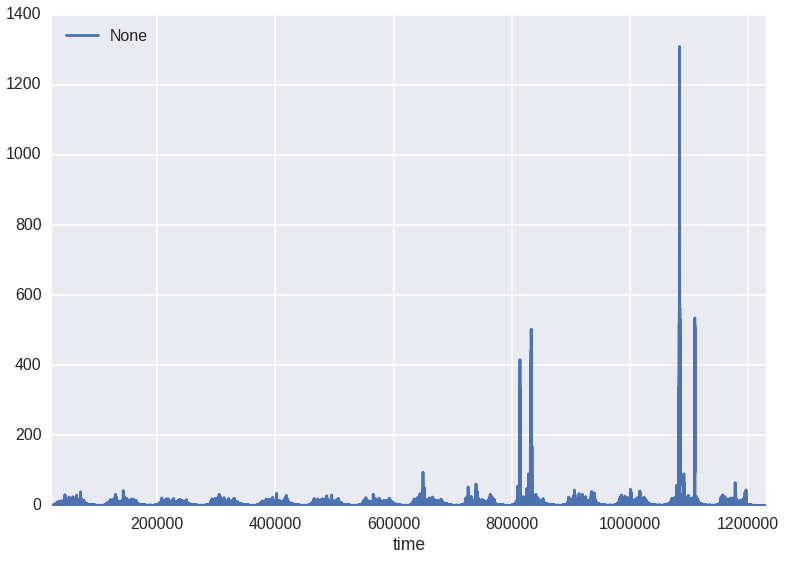

In [28]:
df.plot(x='time', y='time_busy')

In [34]:
resp_times = df.mean_resp_time.values
resp_times.shape

(1188061,)

In [36]:
num_requests = df.num_requests
num_requests.shape

(1188061,)

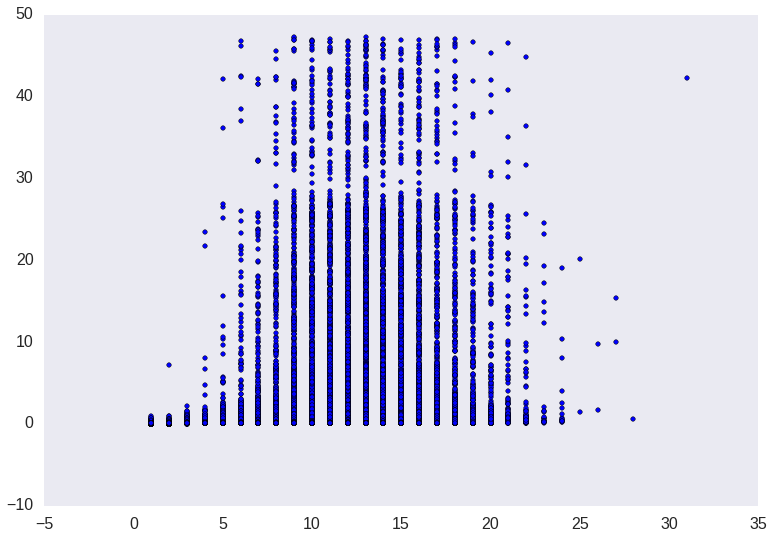

In [40]:
plt.scatter(num_requests, resp_times)

In [12]:
df_early = df[df.time<626400]
df_late = df[df.time>=626400]
# plt.scatter(df_early.num_requests, df_early..values, c='g')
# plt.figure()
# plt.scatter(df_late.num_requests, df_late.time_busy.values, c='r')

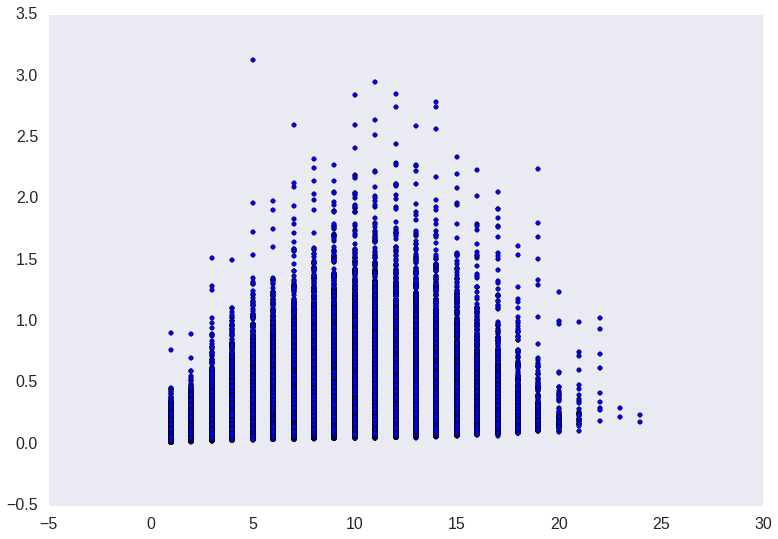

In [17]:
plt.scatter(df_early.num_requests, df_early.mean_resp_time)

(array([  1.23849000e+05,   7.89180000e+04,   9.14130000e+04,
          1.66500000e+05,   8.20830000e+04,   3.77840000e+04,
          1.18440000e+04,   7.43000000e+02,   9.30000000e+01,
          1.30000000e+01]),
 array([  1. ,   3.3,   5.6,   7.9,  10.2,  12.5,  14.8,  17.1,  19.4,
         21.7,  24. ]),
 <a list of 10 Patch objects>)

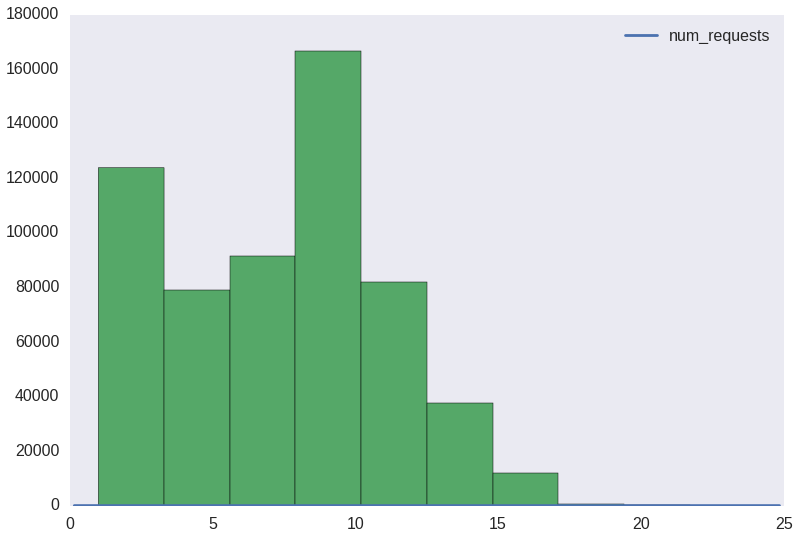

In [20]:
sns.kdeplot(df_early.num_requests)

plt.hist(df_early.num_requests.values)

(-0.05, 0.5)

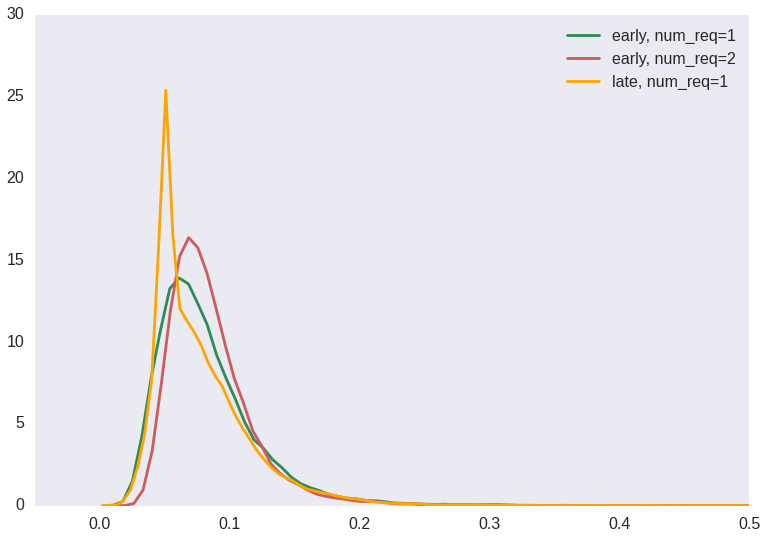

In [56]:
sns.kdeplot(df_early[df_early.num_requests==1].mean_resp_time, label='early, num_req=1', color='seagreen')
sns.kdeplot(df_early[df_early.num_requests==2].mean_resp_time, label='early, num_req=2', color='indianred')
# sns.kdeplot(df_early[df_early.num_requests==3].mean_resp_time, label='early, num_req=3', color='indianred')
# sns.kdeplot(df_early[df_early.num_requests==4].mean_resp_time, label='num_req=4', color='indianred')
# sns.kdeplot(df_early[df_early.num_requests==20].mean_resp_time, label='num_req=20', color='indianred')

sns.kdeplot(df_late[df_late.num_requests==1].mean_resp_time, label='late, num_req=1', color='orange')
# sns.kdeplot(df_late[df_late.num_requests==20].mean_resp_time, label='late, num_req=1', color='purple')

plt.xlim([-0.05, 0.5])

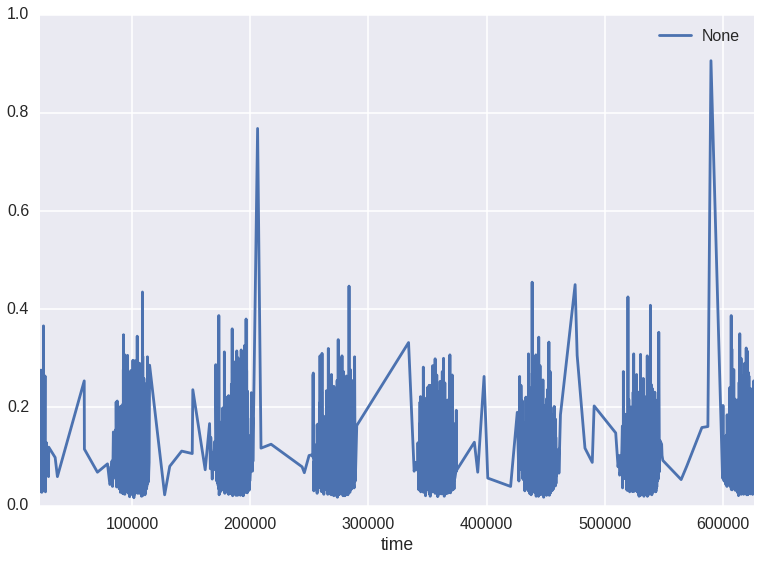

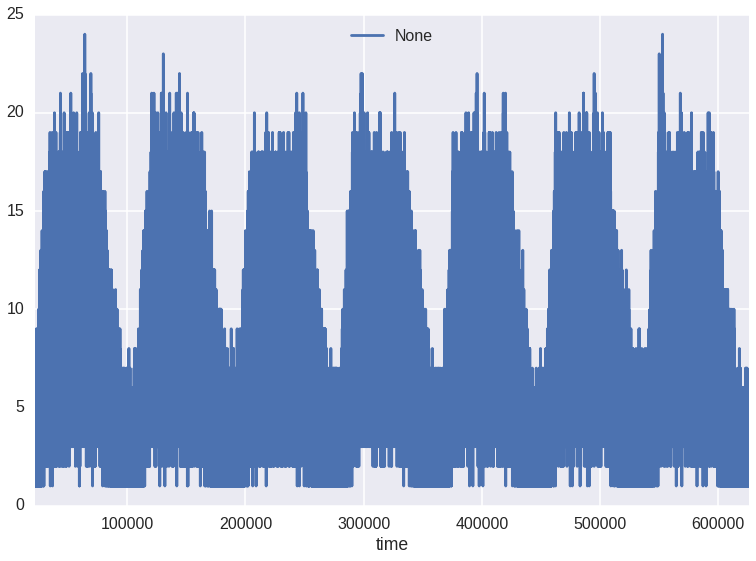

In [53]:
df_early[df_early.num_requests==1].plot(x='time', y='mean_resp_time')
df_early.plot(x='time', y='num_requests')

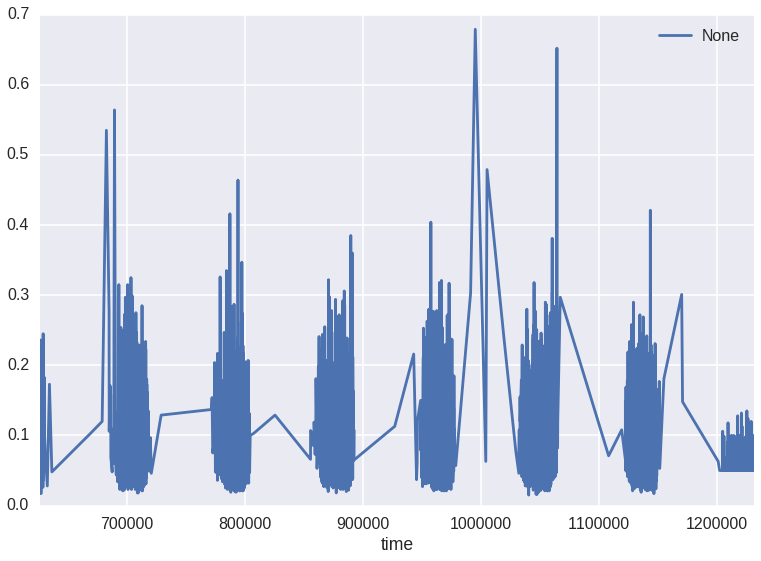

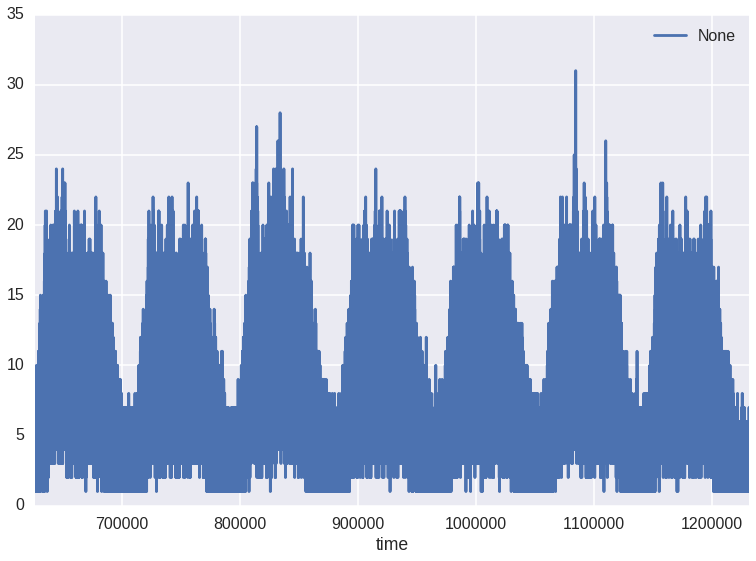

In [54]:
df_late[df_late.num_requests==1].plot(x='time', y='mean_resp_time')
df_late.plot(x='time', y='num_requests')

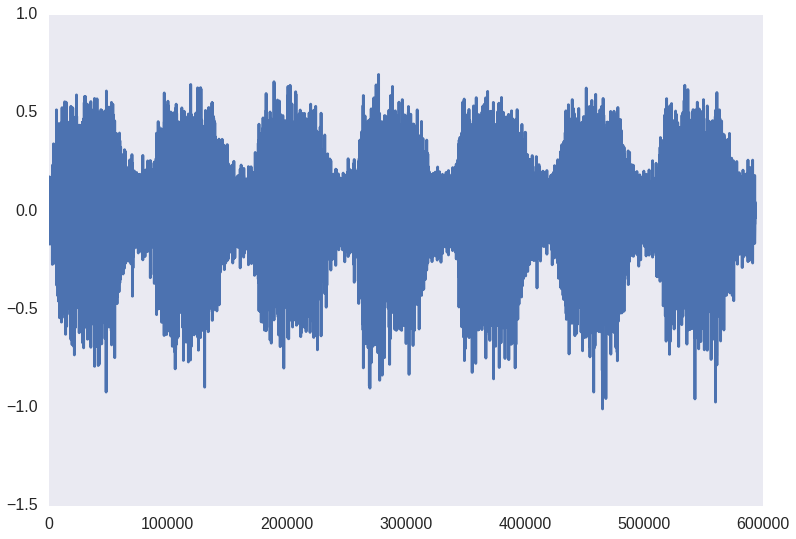

In [16]:
plt.plot(df_early.mean_resp_time.diff())

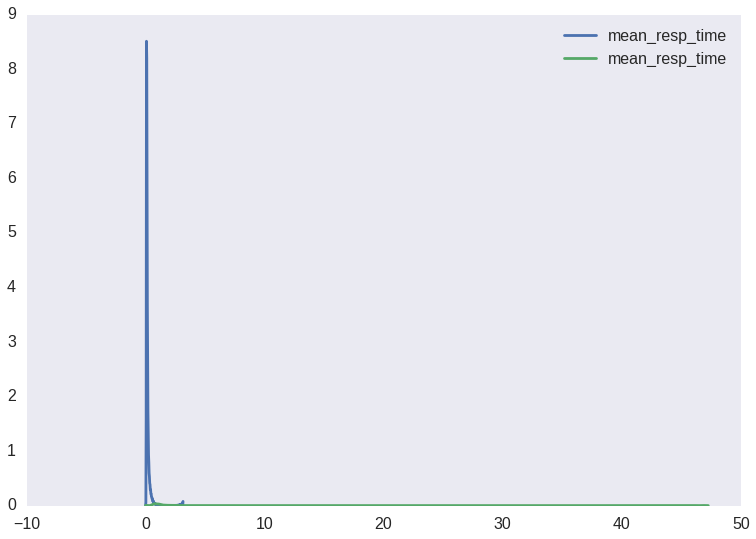

In [59]:
sns.kdeplot(df_early.mean_resp_time)
sns.kdeplot(df_late.mean_resp_time)

In [61]:
df_early.describe()

,time,num_requests,mean_resp_time,time_busy,_cust
count,593240.000000,593240.000000,593240.000000,593240.000000,593240.000000
mean,323349.389589,7.336412,0.158968,1.357926,8.973240
std,174580.450875,3.780260,0.134431,1.605129,4.576711
min,21601.000000,1.000000,0.016000,0.016000,0.319285
25%,171628.750000,4.000000,0.086000,0.368000,5.681818
50%,323199.500000,8.000000,0.116000,0.900000,8.620690
75%,474922.250000,10.000000,0.176000,1.716000,11.627907
max,626398.000000,24.000000,3.132000,42.560000,62.500000


In [63]:
df_late.describe()

,time,num_requests,mean_resp_time,time_busy,_cust
count,594821.000000,594821.000000,594821.000000,594821.000000,594821.000000
mean,928059.734041,7.753699,0.330387,3.638481,8.787750
std,174365.036631,4.023721,1.736299,23.448595,5.154688
min,626400.000000,1.000000,0.015000,0.015000,0.021164
25%,776547.000000,4.000000,0.085000,0.372000,4.926108
50%,928022.000000,8.000000,0.121000,0.990000,8.264463
75%,1079271.000000,11.000000,0.203000,2.100000,11.764706
max,1231198.000000,31.000000,47.250000,1308.851000,66.666667


In [67]:
print(df_early.mean_resp_time.mean())
print(df_early.mean_resp_time.median())

print(df_late.mean_resp_time.mean())
print(df_late.mean_resp_time.median())

0.158968144427
0.11599999999999999
0.330387193794
0.121


In [68]:
print(df_early[df_early.num_requests==1].mean_resp_time.mean())
print(df_early[df_early.num_requests==1].mean_resp_time.median())

print(df_late[df_late.num_requests==1].mean_resp_time.mean())
print(df_late[df_late.num_requests==1].mean_resp_time.median())

0.0820312142212
0.07400000000000001
0.07763057346
0.067


In [62]:
df_2 = pd.read_csv('scenario2.txt', header=None, sep='\t')
df_2.columns=['time', 'num_requests', 'mean_resp_time']
df_2['time_busy'] = df.num_requests * df.mean_resp_time
# df_2['freq'] = 1/df.num_requests
df_2.head()

,time,num_requests,mean_resp_time,time_busy
0,21601,5,0.069,0.104
1,21602,3,0.076,0.034
2,21606,3,0.071,0.385
3,21608,2,0.097,0.256
4,21609,1,0.045,0.138


In [69]:
df_2.plot(x='time')

NameError: name 'df_2' is not defined

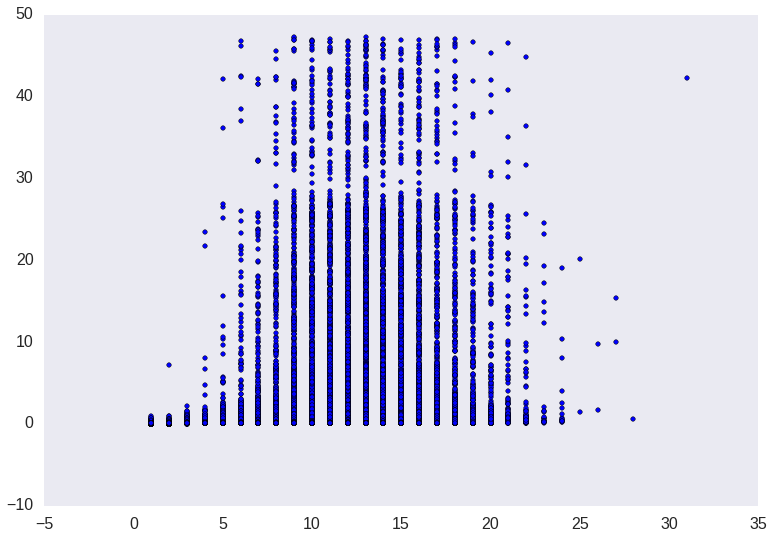

In [72]:
plt.scatter(df.num_requests, df.mean_resp_time)

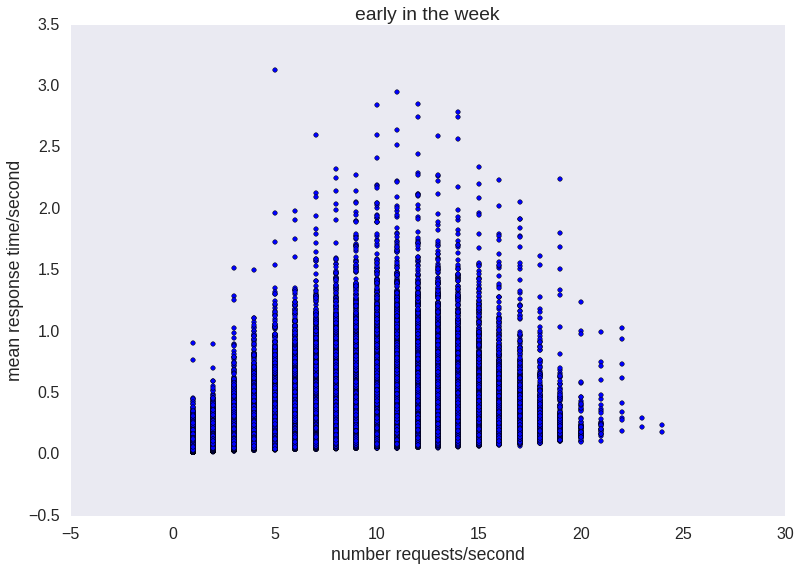

In [75]:
plt.scatter(df_early.num_requests, df_early.mean_resp_time)
plt.title('early in the week')
plt.xlabel('number requests/second')
plt.ylabel('mean response time/second')

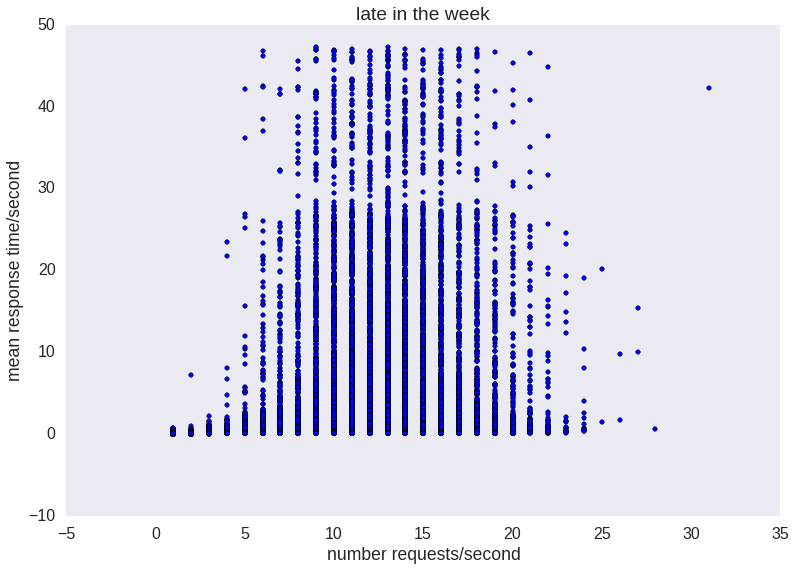

In [77]:
plt.scatter(df_late.num_requests, df_late.mean_resp_time)
plt.title('late in the week')
plt.xlabel('number requests/second')
plt.ylabel('mean response time/second')

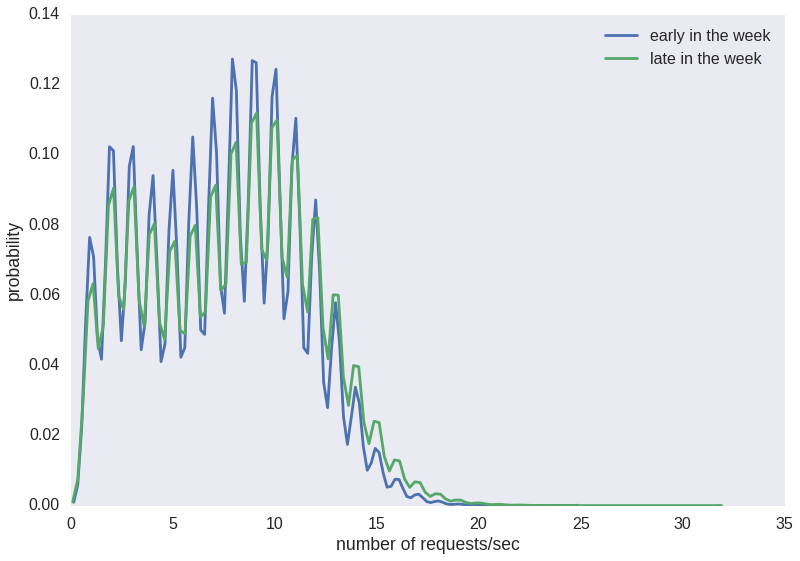

In [80]:
sns.kdeplot(df_early.num_requests, label='early in the week')
sns.kdeplot(df_late.num_requests, label='late in the week')
plt.xlabel('number of requests/sec')
plt.ylabel('probability')

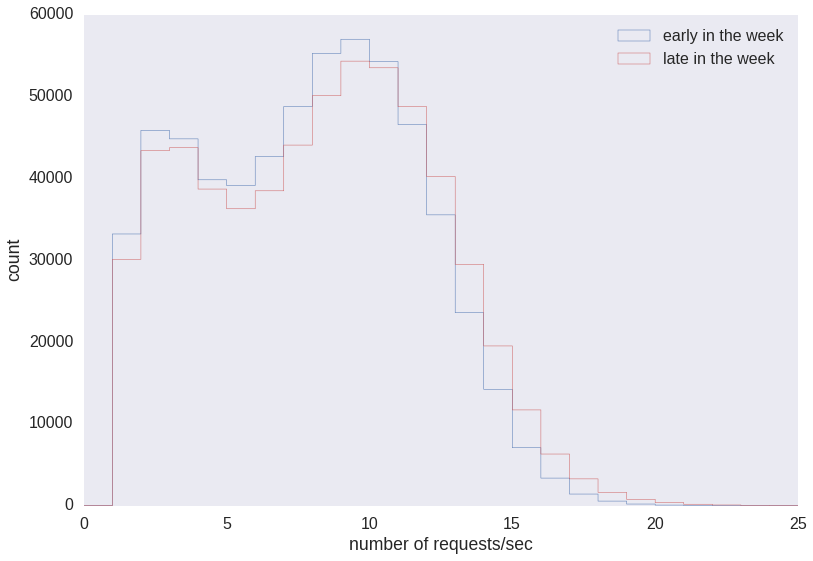

In [118]:
plt.hist(df_early.num_requests, label='early in the week', bins=25, range=[0,25], histtype='step')
# plt.figure()
plt.hist(df_late.num_requests.values, label='late in the week', bins=25, range=[0,25], histtype='step',
         color='indianred', )
# plt.figure()
# sns.kdeplot(df_late.num_requests, label='late in the week')
plt.xlabel('number of requests/sec')
plt.ylabel('count')
plt.legend(loc='best')

(0, 2)

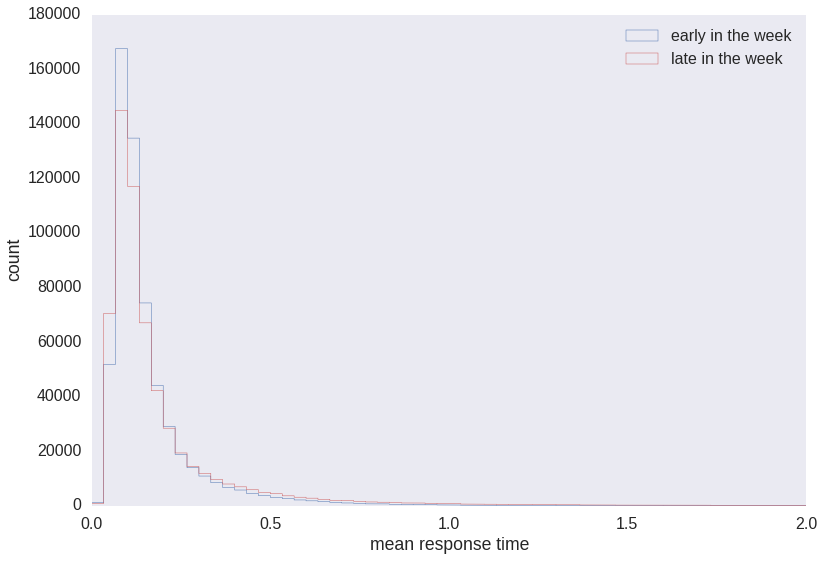

In [125]:
plt.hist(df_early.mean_resp_time, label='early in the week', histtype='step', range=[0,50], bins=1500)
# plt.figure()
plt.hist(df_late.mean_resp_time.values, label='late in the week', histtype='step',
         color='indianred', range=[0,50], bins=1500)
# plt.figure()
# sns.kdeplot(df_late.num_requests, label='late in the week')
plt.xlabel('mean response time')
plt.ylabel('count')
plt.legend(loc='best')

plt.xlim([0,2])

(-0.1, 1.5)

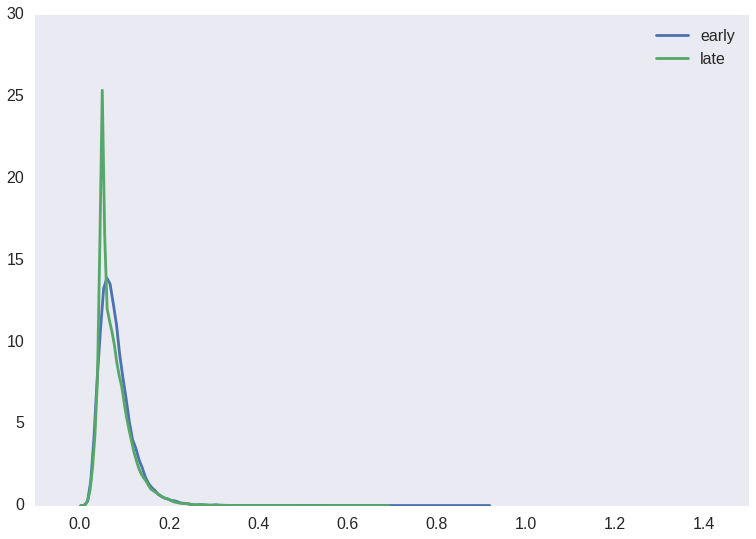

In [133]:
sns.kdeplot(df_early[df_early.num_requests==1].mean_resp_time, label='early')
sns.kdeplot(df_late[df_late.num_requests==1].mean_resp_time, label='late')
plt.xlim([-0.1, 1.5])

(array([  1.17203000e+05,   1.13411000e+05,   1.48452000e+05,
          1.42457000e+05,   6.06810000e+04,   1.11920000e+04,
          1.30500000e+03,   1.12000000e+02,   6.00000000e+00,
          2.00000000e+00]),
 array([  1.,   4.,   7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.]),
 <a list of 10 Patch objects>)

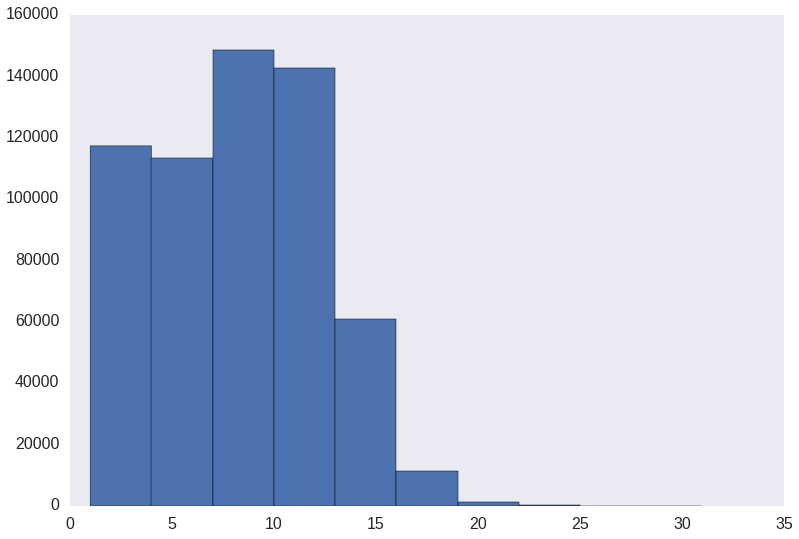

In [98]:
plt.hist(df_late.num_requests.values, label='late in the week',)

# late_num_request = df_late.num_requests.values

# plt.hist(late_num_request)